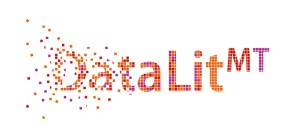

# Data Processing: NMT Training Notebook – Advanced Level
**How to train an NMT model from scratch**

**NOTE: Training an NMT model takes a long time. We advise that you only work through this notebook if you have about TWO HOURS of time to spare.** This is already a very short training time and can only be achieved when training a rather small model. Big NMT models are usually trained over a number of days.

This Colab Notebook covers the sub-dimensions of *Data Processing* (and, to some extent, *Data Creation*) of the [DataLit<sup>MT</sup> Competence Matrix](https://itmk.github.io/The-DataLitMT-Project/matrix/). This notebook guides you step-by-step through accessing previously prepared data to train a neural machine translation (NMT) model using the [OpenNMT-py toolkit](https://opennmt.net/). Training an NMT model is part of *Technical MT Literacy*, as illustrated in the [Professional Machine Translation Literacy Framework](https://itmk.github.io/The-DataLitMT-Project/framework/#professional-mt-literacy). In this notebook, we use the *Transformer* architecture, which was proposed by [Vaswani et al. (2017)](https://papers.nips.cc/paper/2017/hash/3f5ee243547dee91fbd053c1c4a845aa-Abstract.html)). The Transformer has become not only the standard architecture for high-performing NMT systems, but also for large language models such as [Google's BERT](https://ai.googleblog.com/2018/11/open-sourcing-bert-state-of-art-pre.html) or [OpenAI's GPT models](https://openai.com/api/). If you would like to know more about how the Transformer architecture works, check out Jay Alammar's excellent article on [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/).

Note: Before you work through this notebook, we recommend that you complete the Data Planning and Collection (data preparation) task first, either at [Basic Level](https://colab.research.google.com/drive/17aCfPF0Zw80gW0FYg_iRo16YVSMAaNKG?usp=sharing) or at [Advanced Level](https://colab.research.google.com/drive/1ls2DIKkD8B2FgkIEYZVjqpAVcr5IZMRa?usp=sharing) and to *save* the datasets created in this task in your Google Drive folder. If you would like to skip this step and start training your NMT model right away, check the *Accessing Data* step below.

**General Information**
There are a number of open-source frameworks for training an NMT model from scratch, such as [JoeyNMT](https://joeynmt.readthedocs.io/en/latest/) or OpenNMT-py. A comprehensive list of frameworks and pre-trained models can be found, for example, on [Hugging Face](https://huggingface.co/). The code used in this notebook is provided by OpenNMT-py. While it may seem quite complex at first, implementing this code and adjusting relevant parameters is actually rather straightforward. All steps performed in this notebook will be described in detail both here in this notebook and in the accompanying tutorial video. We recommend that you watch the video to get a good overview and a thorough understanding of the process of training an NMT model from scratch.

**Steps to take**
For this MT project scenario, we chose the English-German parallel dataset TED2020, with English being the source and German the target language, as illustrated in our [Basic](https://colab.research.google.com/drive/17aCfPF0Zw80gW0FYg_iRo16YVSMAaNKG?usp=sharing) and [Advanced](https://colab.research.google.com/drive/1ls2DIKkD8B2FgkIEYZVjqpAVcr5IZMRa?usp=sharing) notebooks on Data Planning and Data Collection. As mentioned above, completing one of the the Data Preparation notebooks is a recommended preparatory step for the present notebook, since it will give you a good understanding of how we arrived at the training data to be used in the present notebook. In the Data Preparation notebook, we guide you through downloading the required NMT training data, preparing (cleaned and filtered) and subwording this data, and splitting it into three sub-datasets (training, development and test), which are needed for NMT training. In the present notebook, you will learn how to train an NMT engine from scratch using your three sub-datasets and how to use your NMT model to translate texts. Here, we will use English as the source and German as the target language, but you could also use your dataset to train a German-English NMT model. Of course, if you have a different dataset at hand and know how to access it and implement it here, you are welcome to train an NMT model using this dataset instead.

### Optional – Accessing Data

If you did not complete the previous task on Data Preparation and would like to start training your own NMT model right away, you can access and download all data required for this notebook on our GitHub repository [here](https://github.com/ITMK/DataLitMT/blob/main/learning_resources/NMT_training/TED_data.zip) (the file is called *TED data.zip*). This zip file contains all datasets required for training an NMT in this notebook as well as the subword models needed for desubwording texts translated with our model (described at the end of notebook). Unzip the file and save the data (without re-naming the files) in a folder on your Google Drive. Then you can refer to this Drive folder in this notebook and follow the code. This step is also shown in the tutorial video.

# 0 Housekeeping

For this notebook, it is required that you **change your runtime to GPU**. All Colab Notebooks run on CPU by default. Since we'll be needing more computing power to train an NMT model than can be provided by a CPU, we use the more powerful GPU which Google Colab provides for such use cases.
To switch from CPU to GPU, go to "runtime", and then --> "change runtime". For "hardware accelerator" select GPU.


## Installing OpenNMT-py

First, you need to install the OpenNMT-py package – the most recent version is version 3.0. Simply run the following cell to do so. OpenNMT requires Python 3.7 or above (which should be installed in this Colab environment). For more information on [OpenNMT-py](https://opennmt.net/OpenNMT-py/) and how to use it, have a look at their [GitHub](https://github.com/OpenNMT/OpenNMT-py) or check out the [official documentation](https://opennmt.net/OpenNMT-py/) or the [forum](https://forum.opennmt.net/).

In [ ]:
!pip3 install OpenNMT-py

## Connecting to Google Drive to Access Datasets

Next, you will need to connect this notebook to your Google Drive account in order to then access the datasets that you have previously prepared and saved. To connect this notebook to Google Drive, run the cell below. You will need to select and confirm your Google Account. This step is also shown in the tutorial video.

If connecting to Google Drive was successful, the cell below will output “Drive Mounted”  or a similar message.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

The following step is **important** and you **actively need to change the line of code in the code cell below** to access the folder in your Google Drive where you have previously saved the datasets from the Data Planning and Collection task. In the code below, replace the string "YOUR_FOLDER_NAME" (likely called *MT_data_preparation* from the data preparation task) with the folder that contains your datasets.

If you have done so, run the cell below in order to change the current directory to that folder. This means that you can directly access the data saved in that folder throughout this notebook and you can also save new data directly to that folder. The code cell below will also list the content of your folder. This way, you can make sure that you are actually connected to the correct folder.

Your folder should contain the following datasets from the Data Preparation task (the files should be listed after running the cell below):

*   `TED2020.de-en.de-filtered.de.subword.dev`
*   `TED2020.de-en.de-filtered.de.subword.test`
*   `TED2020.de-en.de-filtered.de.subword.train`
*   `TED2020.de-en.en-filtered.en.subword.dev`
*   `TED2020.de-en.en-filtered.en.subword.test`
*   `TED2020.de-en.en-filtered.en.subword.train`

**Important:** For the following steps, your datasets must be named **exactly** as described here. If not, please re-name your datasets in your Google Drive folder to match the file names used in this notebook. The file names are rather long, but to make sure that the correct files are referred to, please do not rename them (unless you are confident to do so and know how to change the names in all relevant code cells in this notebook).

In [ ]:
%cd /content/drive/MyDrive/MT_data_preparation/
!ls

# If you have saved your data in an 'MT_data_preparation' folder, the code line above would be: %cd /content/drive/MyDrive/MT_data_preparation

/content/drive/MyDrive/MT_data_preparation
source.model
target.model
TED2020.de-en.de-filtered.de.subword.dev
TED2020.de-en.de-filtered.de.subword.test
TED2020.de-en.de-filtered.de.subword.train
TED2020.de-en.en-filtered.en.subword.dev
TED2020.de-en.en-filtered.en.subword.test
TED2020.de-en.en-filtered.en.subword.train


# 1 Creating the Training Configuration File

Before you work through this step, make sure that the previous steps have been completed and that you have connected this notebook to your Google Drive folder. The cell below is the first crucial step towards training an NMT model. It creates a configuration file that contains all information needed to train an NMT model. The cell below defines a Transformer NMT model and the code is provided by OpenNMT, as described above.

It is **important** to note that the parameters used in the code cell below have been adjusted to allow for a quick NMT training. Parameters can be adjusted individually for NMT model training, very much depending on what the training focus should be. Have a look at the [OpenNMT-py training parameters](https://opennmt.net/OpenNMT-py/options/train.html) if you want to know more about the individual parameters. A list of (optional/extensive) parameters for the Tensorflow implementation OpenNMT-tf, many of which can also be used for the Python implementation OpenNMT-py, can be found [here](https://opennmt.net/OpenNMT-tf/configuration.html).

## Parameters

Let's have a more detailed look at the parameters defined below. Please **do not** change anything in the code unless you are confident to do so. It is **not required** to change the code below at this point, you can simply run the cell as it is. We will, however, explain relevant aspects of these parameters here. Again, make sure that your datasets are named **exactly** as described above, since we refer to those datasets by their names in the code below.

* `config.yaml` – The first line creates a configuration file in [yaml](https://yaml.org/spec/1.2.2/) format. It will be saved as *config.yaml* in your Drive folder. This file is needed for NMT training later, as it contains all the information required for defining and training your NMT model!
* `save_data: run` – This indicates that the vocabulary data (created later) will be saved in a folder called *run* in your Drive folder.
* `data` --> `corpus_1` --> `path_src:` –  Here, the path to the source training data in your Drive folder is defined.
* `data` --> `corpus_1` --> `path_tgt:` – Here, the path to the target training data in your Drive folder is defined.
* `data` --> `valid` --> `path_src:` – Here, the path to the source development (often also called validation) data in your Drive folder is defined.
* `data` --> `valid` --> `path_tgt:` –  Here, the path to the target development data in your Drive folder is defined.
* `source_vocab: run/source.vocab` – This indicates that the source vocabulary data (created later) will be saved in the *run* folder in your Drive folder.
* `target_vocab: run/target.vocab` – This indicates that the target vocabulary data (created later) will be saved in the *run* folder in your Drive folder.
* `source_vocab_size` and `target_vocab_size` – This parameter is set to **50k** words, meaning that we use a source and target vocabulary of 50,000 words each.
* `tokenization options` – The input data could be tokenized, which is advised for NMT model training. This parameter refers to the subwording `source.model` and `target.model` that we created in the data preparation task.
* `log_file: train.log` – At the end of the NMT training process, this *train.log* file will also be saved to your Drive folder. It logs all training steps and provides further information on model training.
* `save_model: models/model.fren` – The NMT models trained here will be saved into a separate *models* folder in your Drive folder. They will automatically be named *model.fren_step_1000.pt* and so forth, for each training step. The **final** model (in this case *model.fren_step_4000.pt*, since we use 4,000 training steps as defined below) will then be used to translate the test dataset.
* `save_checkpoint_steps` – This parameter defines how frequently a model is saved. We set it to **1000**, meaning that a model is saved every thousand steps. 
* `keep_checkpoint` – This defines how many of the saved checkpoints will be kept (the latest ones). Trained models take up quite some space, so model checkpoints saved in-between are not needed for final translation but can be kept as a backup or in case the training crashes before it ends. Here we keep 4 checkpoints (i.e., all checkpoints which are created in our training scenario).
* `train_steps` – This defines the training steps for NMT model training. This value is usually set above 100,000 but for a quick tutorial using a small dataset (as in our notebook), we can set this value to **4000** – which will still result in an acceptable translation quality.
* `valid_steps` – This parameter defines how frequently the training data is validated. For this step, the development dataset is used. Here we define validation to take place every **1000** steps. So, a total of four times in our scenario.
* `gpu_ranks = [0]` – A GPU rank of [0] shows that 1 GPU is used (most programming languages start counting from 0). As mentioned above, a GPU (which provides more computing power than a CPU) is needed for NMT training.
* `learning_rate` – This parameter is set to 1 here. 1 is a high value for the learning rate but allows for quicker training, as is our aim in this notebook.Change value for larger datasets and longer training times as specified below.

-------------------------------------------------------------------------------
Not necessary here, but recommended for **larger datasets** (with millions of sentences): 
* `source_vocab_size` and `target_vocab_size` – This parameter can be set to anywhere between 32k and 100k.
* `train_steps` – 100k-200k or more
* `valid_steps` – Can be 10,000 if the train steps are big enough
* `warmup_steps` – Potentially 4000 or 8000
* `save_checkpoint_steps` – (depends on how frequently you want to save checkpoints. Often same value as valid_steps, or more)
* `keep_checkpoint` – (depends on how many saved checkpoints you want to keep – 10 or more)
* `learning_rate` – For larger datasets and longer training times, change this value to as low as 0.0002. Otherwise, the model will learn fast but then stall or even drop back to zero in terms of accuracy.

These parameters are discussed in a little more detail in the tutorial video.

## Creating the Config File

Without further ado, you can now run the cell below to create your `config.yaml` file and load it into your Google Drive folder.

**NOTE: This step is only done once! If you have made a mistake, delete the created `config.yaml` file and run the cell again.**

In [ ]:
# Create the config file

config = '''# config.yaml


## Where the samples will be written
save_data: run

# Training files
data:
    corpus_1:
        path_src: TED2020.de-en.en-filtered.en.subword.train
        path_tgt: TED2020.de-en.de-filtered.de.subword.train
        transforms: [filtertoolong]
    valid:
        path_src: TED2020.de-en.en-filtered.en.subword.dev
        path_tgt: TED2020.de-en.de-filtered.de.subword.dev
        transforms: [filtertoolong]

# Vocabulary files, generated by onmt_build_vocab
src_vocab: run/source.vocab
tgt_vocab: run/target.vocab

# Vocabulary size – should be the same as in SentencePiece
src_vocab_size: 50000
tgt_vocab_size: 50000

# Filter out source/target longer than n if [filtertoolong] enabled
src_seq_length: 150
src_seq_length: 150

# Tokenization options
src_subword_model: source.model
tgt_subword_model: target.model

# Where to save the log file and the output models/checkpoints
log_file: train.log
save_model: models/model.fren

# Stop training if it does not improve after n validations
early_stopping: 10

# Default: 5000 – Save a model checkpoint for each n
save_checkpoint_steps: 1000

# To save space, limit checkpoints to last n
keep_checkpoint: 4

seed: 3435

# Default: 100000 – Train the model to max n steps 
# Increase to 200000 or more for large datasets
# For fine-tuning, add up the required steps to the original steps
train_steps: 4000

# Default: 10000 – Run validation after n steps
valid_steps: 1000

# Default: 4000 – for large datasets, try up to 8000
warmup_steps: 1000
report_every: 100

# Number of GPUs, and IDs of GPUs
world_size: 1
gpu_ranks: [0]

# Batching
bucket_size: 262144
num_workers: 0  # Default: 2, set to 0 when RAM out of memory
batch_type: "tokens"
batch_size: 4096   # Tokens per batch, change when CUDA out of memory
valid_batch_size: 2048
max_generator_batches: 2
accum_count: [4]
accum_steps: [0]

# Optimization
model_dtype: "fp16"
optim: "adam"
learning_rate: 1 # 0.002
# warmup_steps: 8000
decay_method: "noam"
adam_beta2: 0.998
max_grad_norm: 0
label_smoothing: 0.1
param_init: 0
param_init_glorot: true
normalization: "tokens"

# Model
encoder_type: transformer
decoder_type: transformer
position_encoding: true
enc_layers: 6
dec_layers: 6
heads: 8
hidden_size: 512
word_vec_size: 512
transformer_ff: 2048
dropout_steps: [0]
dropout: [0.1]
attention_dropout: [0.1]
'''

with open("config.yaml", "w+") as config_yaml:
  config_yaml.write(config)

Run the cell below to have a look at your Google Drive folder and check whether a *config.yaml* file has indeed been created. It might take a few moments to load.

In [ ]:
# Check the content of your folder
!ls

config.yaml
run
source.model
target.model
TED2020.de-en.de-filtered.de.subword.dev
TED2020.de-en.de-filtered.de.subword.test
TED2020.de-en.de-filtered.de.subword.train
TED2020.de-en.en-filtered.en.subword.dev
TED2020.de-en.en-filtered.en.subword.test
TED2020.de-en.en-filtered.en.subword.train


# Building the Vocabulary

Running the following cell will create your vocabulary. This creates two vocabulary files in your *run* folder, one for the source data and one for the target data (each containing 50k words, as defined in our *config.yaml* file above). You need to make sure that your configuration file is actually saved in your Drive folder, because the following cell refers to this file (*config.yaml*). Simply run the cell below.

**NOTE: This step is only done once! If you have made a mistake, delete the created *run* folder and the source and target vocabulary files and run the cell again.**

In [ ]:
# Build your vocabulary
!onmt_build_vocab -config config.yaml -n_sample -1 -num_threads 2

Corpus corpus_1's weight should be given. We default it to 1 for you.
[2023-02-16 08:46:11,818 INFO] Counter vocab from -1 samples.
[2023-02-16 08:46:11,818 INFO] n_sample=-1: Build vocab on full datasets.
[2023-02-16 08:46:16,188 INFO] * Transform statistics for corpus_1(50.00%):
			* FilterTooLongStats(filtered=44)

[2023-02-16 08:46:16,827 INFO] * Transform statistics for corpus_1(50.00%):
			* FilterTooLongStats(filtered=42)

[2023-02-16 08:46:16,934 INFO] Counters src:48304
[2023-02-16 08:46:16,934 INFO] Counters tgt:49993


Have a look at the *run* sub-folder in your Google Drive folder to check whether a *source.vocab* and a *target.vocab* file have been created. It might take a moment to load.

**Checking the Vocabulary Files** 

It is always good practice to check your files in between steps to make sure that everything has worked well. Run the cell below to print the first and last five vocabulary entries of the source and target vocabulary files.

In [ ]:
print("First 5 vocabulary entries:")
!head -n 5 'run/source.vocab' && echo "----" && head -n 5 'run/target.vocab'
print()
print("Last 5 vocabulary entries:")
!tail -n 5 'run/source.vocab' && echo "-----" && tail -n 5 'run/target.vocab'

First 5 vocabulary entries:
,	257646
.	207678
▁the	166028
▁to	106896
'	101288
----
,	300765
.	222474
▁die	90405
▁und	83564
▁der	59208

Last 5 vocabulary entries:
inventor	1
▁Paperfuge	1
▁igloo	1
Genes	1
injured	1
-----
zuschlafen	1
▁auszuradieren	1
▁kultige	1
▁Poliomyelitis	1
Deshalb	1


# Training

Congratulations on creating the configuration and the vocabulary files! You are now ready to train your own NMT model from scratch! 🎉

Once again, make sure that the configuration file is saved in your original folder under **`config.yaml`**, and the vocabulary files are saved in the *run* folder as `source.vocab` and `target.vocab`.

You can now simply run the cell below and your models will start loading! This step will take around **ONE HOUR** (which means it's coffee time for you). During this time, your computer must **remain on**, it cannot go into standby mode! This is very important. If the computer goes into standby mode or if you close this window, the training **will stop** and you would need to start again.

**NOTE: This step is only done once! If you have made a mistake, delete the created models folder (and model files in that folder) and the train-log file (if already created) and run the cell again.**

**Alternatively, save the previously created files and models in a separate folder (named differently) and run through the process again.**

## Training Explained

The model training is explained in more detail in the tutorial video. Here is just a brief summary of interesting aspects to consider:
* `Step 100/4000` – This indicates the first 100 training steps of a total of 4000. Each subsequent training step will be printed. The model training ends after it has completed `Step 4000/4000`, after the final validation has been done and the final checkpoint (*model.fren_step_4000.pt*) has been saved.
* `acc` – This refers to the **accuracy** of the NMT model (the higher the accuracy, the higher the model quality). Accuracy starts at a very low value and increases as the training progresses. The idea is to get as high an accuracy value as possible. For longer training times, the accuracy might stall, at which point there is no further improvement (risk of [overfitting](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/)) and the training should be stopped.
* `xent` – This refers to the **cross entropy** (which indicates the gap between the actual and the desired state of the model i.e., the lower the cross entropy, the higher the model quality). Cross entropy decreases as the training progresses. Ideally, we want this value to be as close to zero as possible. In our present NMT trainings scenario, the value will likely remain at a value of 2.something.

## Training the NMT Model

Run the code cell below to start training your NMT model.

In [ ]:
# Train the NMT model
!onmt_train -config config.yaml

[2023-02-16 08:52:00,556 WARNING] Corpus corpus_1's weight should be given. We default it to 1 for you.
[2023-02-16 08:52:00,557 INFO] Parsed 2 corpora from -data.
[2023-02-16 08:52:00,558 INFO] Get special vocabs from Transforms: {'src': [], 'tgt': []}.
[2023-02-16 08:52:00,834 INFO] Building model...
[2023-02-16 08:52:06,480 INFO] NMTModel(
  (encoder): TransformerEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(48312, 512, padding_idx=1)
        )
        (pe): PositionalEncoding()
      )
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiHeadedAttention(
          (linear_keys): Linear(in_features=512, out_features=512, bias=False)
          (linear_values): Linear(in_features=512, out_features=512, bias=False)
          (linear_query): Linear(in_features=512, out_features=512, bias=False)
          (soft

Congratulations – you have trained your own NMT model!

# Translation

Now it's time to put your model to test by translating your first test file. For this step, the code cell below refers to your *latest model*, which should be saved in the *models* folder in your original Drive folder as **model.fren_step_4000.pt**. The cell also refers to your test dataset, which should be saved in your original Drive folder as `TED2020.de-en.en-filtered.en.subword.test`.

In the cell below, we define the `-output` (the translation produced by the model) to be named **translation**. This creates a file in your folder simply called **translation**.

You can now simply run the cell below. Your NMT model will then produce a subworded translation of your test dataset. Translating this dataset will take some time. The translation output will be printed during the process.

## Translation Explained

Let's have a closer look at the translation options available in the code cell below:
* `-model` – Refers to the last model checkpoint name. You can try testing the quality of multiple checkpoints.
* `-src` – Refers to the source file: the subworded test dataset.
* `-output` – Refers to the new translation output file; this can be named as required (we call it *translation*).
* `-gpu` – Is set to 0, meaning that you actually use one GPU.
* `-min_length` – [optional] To avoid empty translations, we set this value to 2.
* `-verbose` – [optional] Prints the translations during the process. You could delete `-verbose` if you don't want to see the translation below.

You can refer to the [OpenNMT-py translation options](https://opennmt.net/OpenNMT-py/options/translate.html) for more details.

## Translating

In [ ]:
# Translate the subworded source file of the test dataset
!onmt_translate -model models/model.fren_step_4000.pt -src TED2020.de-en.en-filtered.en.subword.test -output translation -gpu 0 --min_length 2 --verbose

## Checking the Translation File

In case you deleted `-verbose` above, you can check the first 5 lines (or more if you change the value in the first line of code below) of your translation here. `translation` in the cell below refers to your translation file as saved during the step above. If you have changed the name of your translation file, this needs to be changed in the cell below as well. Otherwise, simply run the cell below to print the first 5 lines of your (subworded) translation (don't expect a DeepL-level translation quality; remember that we are training a very small model with a standard parameter set here). You can also re-load your Drive folder and the full translation file created above should have been saved there.

In [ ]:
!head -n 5 translation

▁Aber ▁es ▁bleibt ▁so ▁viel ▁übrig , ▁von ▁den ▁anderen ▁ 9 , 9 ▁Prozent ▁der ▁Dinge ▁zu ▁lernen , ▁die ▁jemals ▁gelebt ▁haben .
▁Aber ▁mit ▁Hilfe ▁von ▁Technik ▁und ▁ Einfallsreichtum ▁wuchs ▁die ▁Vietnamesen ▁auf .
▁So ▁sehr ▁schnell ▁-- ▁ungefähr ▁sechs ▁Wochen ▁in ▁diese ▁Forschung ▁-- ▁Ich ▁habe ▁diese ▁komplett ▁b röcke lt er , ▁dass ▁ich ▁die ▁Verbindung ▁absolut ▁auf ▁eine ▁Art ▁und ▁Weise , ▁die ▁ich ▁nicht ▁verstand ▁oder ▁nie ▁hatte .
▁" Der ▁warme ▁Winde ▁können ▁dich ▁nicht ▁berühren ."
▁Amerikaner ▁erkannten ▁seine ▁Leistung ▁und ▁riefen ▁den ▁Pfad : ▁" Eine s ▁der ▁größten ▁ Errungenschaften ▁des ▁ 2 0 . ▁Jahrhunderts ."


# Desubwording your Translation

Now you have to desubword your translation file for further evaluation. This will remove the underscores visible in the subworded translation output above and combine individual subwords such as *_v* and *erfassungswidrig* into full words such as *verfassungswidrig*. In order to desubword your translation, we need to take two important steps: 1. connect this notebook to the [DataLitMT Github Repository](https://github.com/ITMK/DataLitMT), and 2. refer to the **subword models** (specifically *target.model*) trained in the previous data preparation task. Check to see in which folder you have saved these models because you will need to access them here.

**Note**: If you do not have the saved subword models available, scroll up to the beginning of this notebook to the *Optional – Accessing Data* section. You can download the TED data zip file which also contains the subword source and target models. You can upload the subworded target file into your Google Drive folder and then run the cells below. This step is also explained in the tutorial video.

Let's first connect this notebook to the GitHub repository by simply running the code cell below.

In [ ]:
# Connect to the DataLitMT GitHub
!git clone https://github.com/ITMK/DataLitMT.git

Let's now install the latest version of [SentencePiece](https://aclanthology.org/D18-2012/) (a language-independent subword tokenizer and detokenizer for neural network-based text processing, such as NMT). Simply run the cell below.

In [ ]:
# If needed install/update SentencePiece
!pip3 install --upgrade -q sentencepiece

If you know where you saved your **subword target.model** from the Data Planning and Collection task, you can desubword your translation. In the cell below, we need to access three files:

1. The desubwording python file from the DataLit<sup>MT</sup> GitHub repository accessed by `DataLitMT/data-preparation/desubword.py` (no need to change anything here),
2.   Your subword *target.model* (from the previous task) – if this is saved in a different folder, you need to change the cell below to `YOUR_FOLDER/target.model` to access it,
3.   The translation that you just created above – If you saved it under a different name, you need to change the name `translation` below.

In [ ]:
# Desubword the translation file
!python3 DataLitMT/learning_resources/data_planning_and_collection/desubword.py target.model translation

Done desubwording! Output: translation.desubword


The desubworded translation file will have been saved automatically to your working folder as `translation.desubworded`, so check your Drive folder for this file. Again, if you re-named your translation file, check for the file `your_name.desubworded`.

You can also check the first 5 lines of the subworded file by running the cell below. If needed, change the name of your translation file.

In [ ]:
# Check the first 5 lines of the desubworded translation file
!head -n 5 translation.desubword

Aber es bleibt so viel übrig, von den anderen 9,9 Prozent der Dinge zu lernen, die jemals gelebt haben.
Aber mit Hilfe von Technik und Einfallsreichtum wuchs die Vietnamesen auf.
So sehr schnell -- ungefähr sechs Wochen in diese Forschung -- Ich habe diese komplett bröckelter, dass ich die Verbindung absolut auf eine Art und Weise, die ich nicht verstand oder nie hatte.
"Der warme Winde können dich nicht berühren."
Amerikaner erkannten seine Leistung und riefen den Pfad: "Eines der größten Errungenschaften des 20. Jahrhunderts."


Compare this desubworded translation output to the subworded translation output above to see which changes were made through this desubwording step.

Now you can also **desubword the reference dataset**: the German test dataset you have split from the original dataset during the Data Planning and Collection task. It should be saved as `TED2020.de-en.de-filtered.de.subword.test` and can now be used as a reference against which you can compare the German translation.

Reference data is needed to perform a manual or automatic quality evaluation of an NMT model by analysing the output by analysing the model output. Automatic quality evaluation is further explained in our respective [Basic Level](https://colab.research.google.com/drive/1UgsqgN-6yfDESU7Geei4RXzJShEQNViZ?usp=sharing
) and [Advanced Level](https://colab.research.google.com/drive/19a896dbRBVtJmqA6JIFBU7bUiASfAo6V?usp=sharing) notebooks.

Note: If you have trained the NMT model from German to English or for a different language combination, make sure you refer to the correct test data as the reference below.

In [ ]:
# Desubword the target file (reference) of the test dataset
!python3 DataLitMT/learning_resources/data_planning_and_collection/desubword.py target.model TED2020.de-en.de-filtered.de.subword.test

Done desubwording! Output: TED2020.de-en.de-filtered.de.subword.test.desubword


Equally, the desubworded reference file should now have been saved automatically to your Drive folder as `TED2020.de-en.de-filtered.de.subword.test.desubworded` – Check your folder for this file. Of course, you can also change the name of this file if later you make sure to refer to the correct file names when, for example, calculating automatic quality scores for your translation output.
Run the cell below to check the first 5 lines of the desubworded reference (test) set.


In [ ]:
# Check the first 5 lines of the desubworded reference
!head -n 5 TED2020.de-en.de-filtered.de.subword.test.desubword

Aber es gibt noch viele andere Quellen, z.B. die 99,9 Prozent der Lebewesen, die auf der Erde heimisch waren.
Aber mit Baukunst und Einfallsreichtum wurde der Pfad erweitert und verbessert.
Sehr bald -- bereits nach etwa sechs Wochen Forschung -- traf ich auf diese unbenannte Sache, die Verbindung gänzlich entschlüsselte, auf eine Weise, die ich nicht verstand oder nie zuvor gesehen hatte.
"Die heißen Winde können dir nichts antun."
Amerika erkannte diese Leistung und nannte es: "Die größte Leistung in militärischer Konstruktion im 20.


# Quick Evaluation

In this section, we will calculate the **BLEU** score by [Papineni et al. (2002)](https://www.aclweb.org/anthology/P02-1040.pdf) in its **sacreBLEU implementation** ([Post 2018](https://aclanthology.org/W18-6319/)) (for the translation (`translation`) by referring to the reference data (the test dataset `TED2020.de-en.de-filtered.de.subword.test.desubworded`).

For this, you will need to install the sacreBLEU package by simply running the cell below.

In [ ]:
# Install and import (sacre)BLEU functions
!pip install sacrebleu
import sacrebleu
from sacrebleu.metrics import BLEU

Now you can calculate the BLEU score for your translation by running the cell below. Once again, if you have changed the name of your files, please adapt the file names accordingly in the cell below.

In [ ]:
# Calculate a sacreBLEU score for your translation
!sacrebleu TED2020.de-en.de-filtered.de.subword.test.desubword -i translation.desubword -m bleu --score-only --width 2

23.60


BLEU scores are interpreted on a scale between 0 and 100. The closer the score is to 100, the higher the quality of the translation. Again, don't expect a very high score here, as we've trained only a small NMT model using a standard parameter set.

There is a range of automatic metrics, for MT quality evaluation. Have a look at our [notebook on automatic MT quality evaluation](https://colab.research.google.com/drive/19xcHt9oLcvcSLGOepayTOIO_wkSPSZmG?usp=sharing) for a more detailed introduction to the topic. You can also use the code in our quality evaluation notebook to calculate different scores for your translation output produced in the present notebook.

Congratulations! You have now successfully trained an NMT model from scratch using your previously prepared datasets, and you have created a translation using this NMT model. Finally, you have performed a quick quality evaluation by calculating a BLEU score for your translation output. Welcome to the MT community! 😀